In [72]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

### 1.1 Приближенное вычисление элементарных функций

In [105]:
def exp_taylor(x, epsilon=1e-6):
    result = 1.0
    term = 1.0
    n = 1 
    
    while abs(term) > epsilon/2:
        term *= x / n
        result += term
        n += 1
    
    return result

x = int(input())
epsilon = float(input())
print(exp_taylor(x, epsilon))

 -10
 0.0001


5.296383291827835e-05


### 1.2 Численное дифференцирование

#### Первая производная

In [113]:
x = np.array([1, 1.5, 2, 2.5, 3])
y = np.array([0, 0.40547, 0.69315, 0.91629, 1.0986])
x_target = 2

index = np.where(x == x_target)[0][0]
x_left, x_right, x_center = x[index - 1], x[index + 1], x[index]
y_left, y_right, y_center = y[index - 1], y[index + 1], y[index]

derivative_center = (y_right - y_left) / (x_right - x_left)
print(f"derivative_center = {derivative_center:.5f}")

derivative_left = (y_center - y_left) / (x_center - x_left)
print(f"derivative_left = {derivative_left:.5f}")

derivative_right = (y_right - y_center) / (x_right - x_center)
print(f"derivative_right = {derivative_right:.5f}")

derivative_center = 0.51082
derivative_left = 0.57536
derivative_right = 0.44628


#### Вторая производная

In [112]:
x = np.array([1, 1.5, 2, 2.5, 3])
y = np.array([0, 0.40547, 0.69315, 0.91629, 1.0986])
x_target = 2

index = np.where(x == x_target)[0][0]

h = x[index + 1] - x[index]
y_left, y_center, y_right = y[index - 1], y[index], y[index + 1]

second_derivative = (y_left - 2 * y_center + y_right) / h**2
print(f"second_derivative = {second_derivative:.5f}")

second_derivative = -0.25816


### 1.3 Интерполяционные многочлены Лагранжа и Ньютона

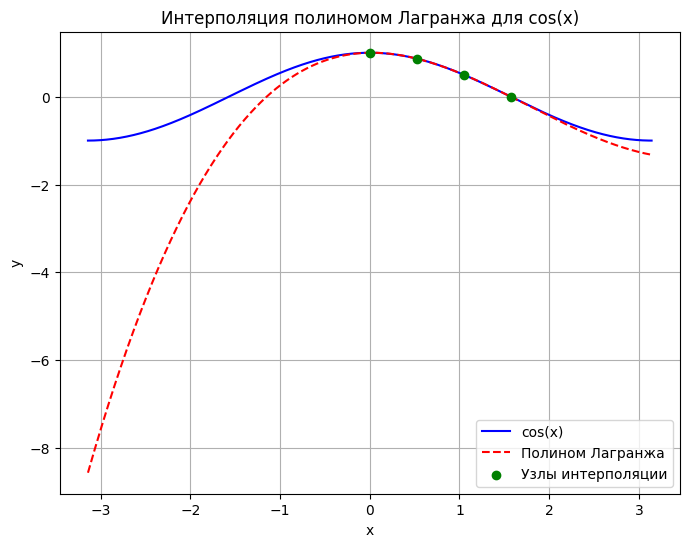

In [114]:
def lagrange_polynomial(x_points, y_points, x):
    n = len(x_points)
    result = 0
    
    for i in range(n):
        term = y_points[i]
        for j in range(n):
            if i != j:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        result += term
    return result

x_points = [0, np.pi / 6, np.pi / 3, np.pi / 2]
y_points = [np.cos(x) for x in x_points]

x_values = np.linspace(-np.pi, np.pi , 1000)
cos_values = np.cos(x_values)

lagrange_values = [lagrange_polynomial(x_points, y_points, x) for x in x_values]

plt.figure(figsize=(8, 6))
plt.plot(x_values, cos_values, label='cos(x)', color='blue')
plt.plot(x_values, lagrange_values, label='Полином Лагранжа', color='red', linestyle='--')
plt.scatter(x_points, y_points, color='green', zorder=5, label='Узлы интерполяции')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяция полиномом Лагранжа для cos(x)')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
print('значение полинома Лагранжа = '+str(lagrange_polynomial(x_points, y_points, np.pi/4)))
print('значение функции = '+str(np.cos(np.pi/4)))

значение полинома Лагранжа = 0.7058892896287468
значение функции = 0.7071067811865476


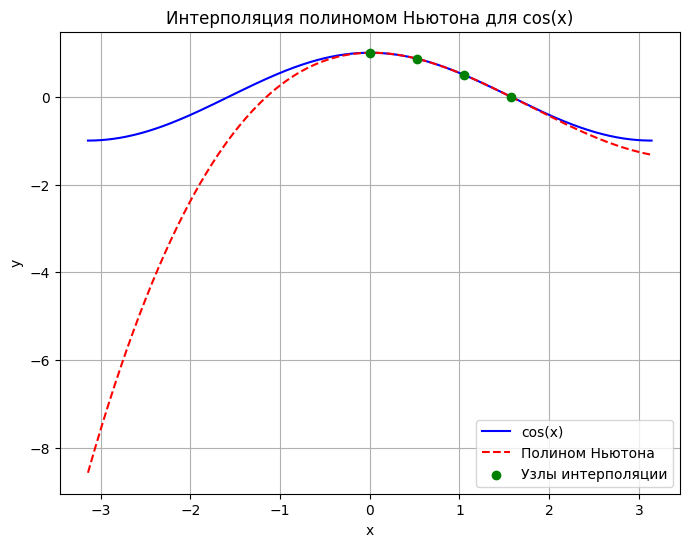

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x_points, y_points):
    n = len(y_points)
    coeff = np.zeros([n, n])
    coeff[:, 0] = y_points

    for j in range(1, n):
        for i in range(n - j):
            coeff[i, j] = (coeff[i + 1, j - 1] - coeff[i, j - 1]) / (x_points[i + j] - x_points[i])
    
    return coeff[0, :]

def newton_polynomial(x_points, y_points, x):
    coeff = divided_diff(x_points, y_points)
    result = coeff[0]
    for i in range(1, len(x_points)):
        term = coeff[i]
        for j in range(i):
            term *= (x - x_points[j])
        result += term
        
    return result

x_points = [0, np.pi / 6, np.pi / 3, np.pi / 2]
y_points = [np.cos(x) for x in x_points]

x_values = np.linspace(-np.pi, np.pi , 1000)
cos_values = np.cos(x_values)

newton_values = [newton_polynomial(x_points, y_points, x) for x in x_values]

plt.figure(figsize=(8, 6))
plt.plot(x_values, cos_values, label='cos(x)', color='blue')
plt.plot(x_values, newton_values, label='Полином Ньютона', color='red', linestyle='--')
plt.scatter(x_points, y_points, color='green', zorder=5, label='Узлы интерполяции')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяция полиномом Ньютона для cos(x)')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
print('значение полинома Ньютона = '+str(newton_polynomial(x_points, y_points, np.pi/4)))
print('значение функции = '+str(np.cos(np.pi/4)))

значение полинома Ньютона = 0.7058892896287468
значение функции = 0.7071067811865476


### 1.4 Интерполяция сплайнами

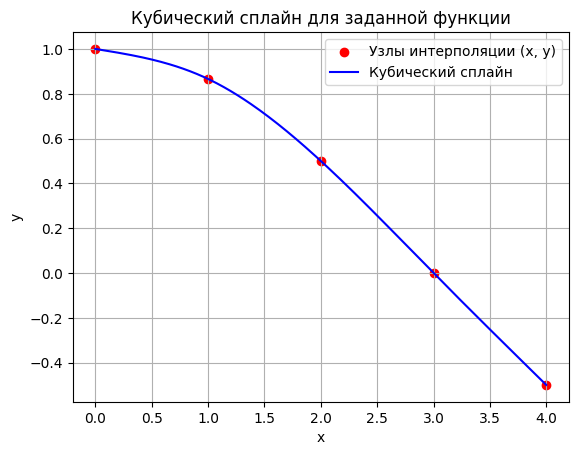

In [137]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 0.86603, 0.5, 0, -0.5])


cs = CubicSpline(x, y, bc_type='natural')

x_new = np.linspace(0, 4, 201)
y_new = cs(x_new)

plt.scatter(x, y, color='red', label='Узлы интерполяции (x, y)')
plt.plot(x_new, y_new, label='Кубический сплайн', color='blue')
plt.title('Кубический сплайн для заданной функции')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
x_test = 1.5
y_test = cs(x_test)

print(f"Значение функции сплайна в x = {x_test}: y = {y_test}")

Значение функции сплайна в x = 1.5: y = 0.7108741517857142


In [140]:
print((y_new[150]-y_new[149])/(x_new[150]-x_new[149]))
print((y_new[151]-y_new[150])/(x_new[151]-x_new[150]))

-0.5111653850000005
-0.5105273630000001


In [139]:
x_new[150]

3.0

In [80]:
x_test = 1.5
y_test = spline(x_test)

print(f"Значение функции сплайна в x = {x_test}: y = {y_test}")

Значение функции сплайна в x = 1.5: y = 0.7108741517857143


### 1.5 Метод наименьших квадратов

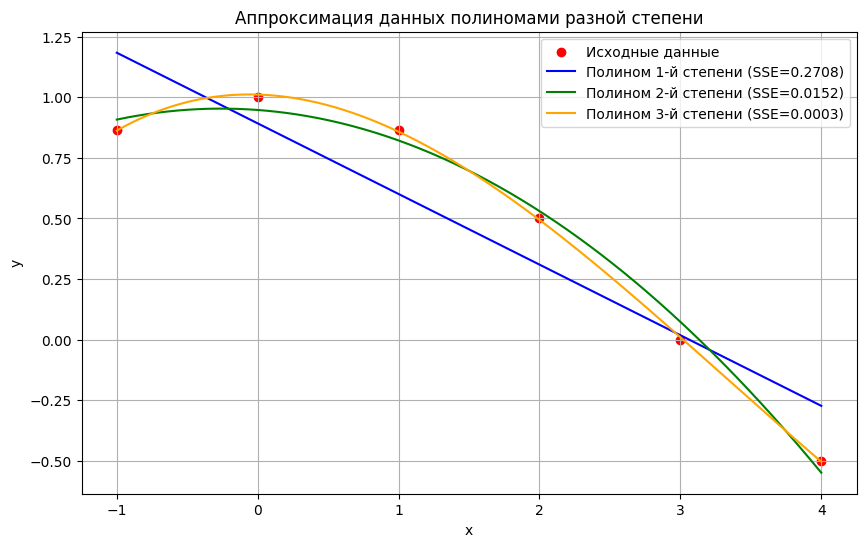

Полиномы:
1-й степени: P(x) = [-0.29131943  0.89232248]; SSE = 0.2708
2-й степени: P(x) = [-0.08274946 -0.04307104  0.94748879]; SSE = 0.0152
3-й степени: P(x) = [ 0.01512935 -0.15083155 -0.01735114  1.01103206]; SSE = 0.0003


In [145]:
import numpy as np
import matplotlib.pyplot as plt

# Данные
x = np.array([-1, 0, 1, 2, 3, 4], dtype=float)
y = np.array([0.86603, 1, 0.86603, 0.5, 0, -0.5], dtype=float)

# Функция для вычисления аппроксимации и суммы квадратов отклонений
def fit_and_evaluate(x, y, degree):
    # Находим коэффициенты полинома степени `degree`
    coeffs = np.polyfit(x, y, degree)
    # Вычисляем значения аппроксимирующего полинома в точках x
    y_approx = np.polyval(coeffs, x)
    # Сумма квадратов отклонений
    sse = np.sum((y - y_approx)**2)
    return coeffs, sse

# Полиномы разной степени
coeffs_deg1, sse_deg1 = fit_and_evaluate(x, y, 1)  # Полином 1-й степени
coeffs_deg2, sse_deg2 = fit_and_evaluate(x, y, 2)  # Полином 2-й степени
coeffs_deg3, sse_deg3 = fit_and_evaluate(x, y, 3)  # Полином 3-й степени

# Построение графиков
x_dense = np.linspace(np.min(x), np.max(x), 500)  # Для гладкости кривых
y_deg1 = np.polyval(coeffs_deg1, x_dense)  # Полином 1-й степени
y_deg2 = np.polyval(coeffs_deg2, x_dense)  # Полином 2-й степени
y_deg3 = np.polyval(coeffs_deg3, x_dense)  # Полином 3-й степени

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Исходные данные')  # Данные
plt.plot(x_dense, y_deg1, label=f'Полином 1-й степени (SSE={sse_deg1:.4f})', color='blue')
plt.plot(x_dense, y_deg2, label=f'Полином 2-й степени (SSE={sse_deg2:.4f})', color='green')
plt.plot(x_dense, y_deg3, label=f'Полином 3-й степени (SSE={sse_deg3:.4f})', color='orange')

# Настройка графика
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация данных полиномами разной степени')
plt.legend()
plt.grid(True)
plt.show()

# Вывод коэффициентов и суммы квадратов отклонений
print("Полиномы:")
print(f"1-й степени: P(x) = {coeffs_deg1}; SSE = {sse_deg1:.4f}")
print(f"2-й степени: P(x) = {coeffs_deg2}; SSE = {sse_deg2:.4f}")
print(f"3-й степени: P(x) = {coeffs_deg3}; SSE = {sse_deg3:.4f}")

### 1.6 Численное интегрирование

#### Метод прямоугольников

In [110]:
def f(x):
    return x / (3 * x + 4)**2

def rectangle_method(a, b, h, method='left'):
    n = int((b - a) / h)
    integral = 0

    for i in range(n):
        if method == 'left':
            x = a + i * h
        elif method == 'right':
            x = a + (i + 1) * h
        elif method == 'mid':
            x = a + (i + 0.5) * h
        integral += f(x) * h

    return integral

a = 0
b = 4
h = 1

left = rectangle_method(a, b, h, method='left')
mid = rectangle_method(a, b, h, method='mid')
right = rectangle_method(a, b, h, method='right')

print(f"Метод левых прямоугольников: {left:.6f}")
print(f"Метод центральных прямоугольников: {mid:.6f}")
print(f"Метод правых прямоугольников: {right:.6f}")

Метод левых прямоугольников: 0.058160
Метод центральных прямоугольников: 0.072841
Метод правых прямоугольников: 0.073785


#### Метод Трапеций

In [82]:
def f(x):
    return x / (3 * x + 4)**2


def trapezoidal_method(a, b, h):
    n = int((b - a) / h) 
    x = np.linspace(a, b, n + 1)
    y = f(x)

    integral = 0.5 * h * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
    return integral

a = 0
b = 4 
h = 1 
print(trapezoidal_method(a, b, h))

0.06597214255524694


#### Метод Симпсона

In [83]:
def f(x):
    return x / (3 * x + 4)**2

def simpson_method(a, b, h):
    n = int((b - a) / h)
    x = np.linspace(a, b, n + 1)
    y = f(x)
    integral = h / 3 * (y[0] + 4 * np.sum(y[1:n:2]) + 2 * np.sum(y[2:n-1:2]) + y[-1])
    return integral

a = 0 
b = 4
h = 1 

print(simpson_method(a, b, h))

0.0694211900736626


### 2.1 Метод Гаусса

In [10]:
import numpy as np

A = np.array([
    [-2, -9, -3, 7],
    [-7,  2,  2, 5],
    [-6,  2,  0, 0],
    [ 0, -3,  8, -3]
], dtype=float)

B = np.array([-26, -25, -16, -5], dtype=float)

augmented_matrix = np.hstack([A, B.reshape(-1, 1)])

n = len(B)
for i in range(n):
    factor = augmented_matrix[i, i]
    augmented_matrix[i] = augmented_matrix[i] / factor
    
    for j in range(i + 1, n):
        factor = augmented_matrix[j, i]
        augmented_matrix[j] = augmented_matrix[j] - factor * augmented_matrix[i]

X = np.zeros(n)
for i in range(n - 1, -1, -1):
    X[i] = augmented_matrix[i, -1] - np.sum(augmented_matrix[i, i+1:n] * X[i+1:n])

print("Решение системы:")
for i, x in enumerate(X, 1):
    print(f"x{i} = {x:.4f}")

Решение системы:
x1 = 3.1822
x2 = 1.5465
x3 = -0.4186
x4 = -0.9961


### 2.2 Метод прогонки

In [1]:
x1, x2, x3, x4, x5 = sp.symbols('x1 x2 x3 x4 x5')

# Уравнения системы
eq1 = -12*x1 - 7*x2 - (-102)
eq2 = -7*x1 - 11*x2 - 3*x3 - (-92)
eq3 = -7*x2 + 21*x3 - 8*x4 - (-65)
eq4 = 4*x3 - 13*x4 + 5*x5 - 38
eq5 = -6*x4 + 14*x5 - (-12)

# Решаем систему
solution = sp.solve([eq1, eq2, eq3, eq4, eq5], (x1, x2, x3, x4, x5))

# Вывод результата
print("Решение:")
for var, value in solution.items():
    print(f"{var} = {value}")

Решение:
x1 = 5
x2 = 6
x3 = -3
x4 = -5
x5 = -3


In [91]:
P, Q = [0]*5, [0]*5
A = [[-12, -7, 0, 0, 0, -102],
     [-7, -11, -3, 0, 0, -92], 
     [0, -7, 21, -8, 0, -65],
     [0, 0, 4, -13, 5, 38],
     [0, 0, 0, -6, 14, -12]
    ]
P[0] = -A[0][1]/A[0][0]
Q[0] = A[0][5]/A[0][0]
P[4] = 0
for i in range(1,4):
    P[i] = -A[i][i+1]/(A[i][i]+A[i][i-1]*P[i-1])
    Q[i] = (A[i][5] - A[i][i-1]*Q[i-1])/(A[i][i]+A[i][i-1]*P[i-1])
i = 4 
Q[i] = (A[i][5] - A[i][i-1]*Q[i-1])/(A[i][i]+A[i][i-1]*P[i-1])
ans = [0]*5
ans[4] = Q[4]
for i in range(3,-1,-1):
    ans[i] = P[i]*ans[i+1]+Q[i]
for i, val in enumerate(ans, start=1):
    print(f"x{i} = {val:.4f}")


x1 = 5.0000
x2 = 6.0000
x3 = -3.0000
x4 = -5.0000
x5 = -3.0000


### 2.3 Итерационные методы решения СЛАУ

##### простая итерация

In [94]:
import numpy as np

def iterate(x):
    x1_new = (50 + 2 * x[2] - 7 * x[3]) / 16
    x2_new = (2 + x[0] + 3 * x[2] - 2 * x[3]) / 14
    x3_new = (273 - 5 * x[0] - 5 * x[1] - 7 * x[3]) / 26
    x4_new = (111 + 2 * x[0] + 6 * x[1] - 9 * x[2]) / 24
    return np.array([x1_new, x2_new, x3_new, x4_new])

x = [50, 2, 273, 111]
tolerance = 0.01
max_iterations = 1000

for iteration in range(max_iterations):
    x_new = iterate(x)
    if np.linalg.norm(x_new - x, ord=np.inf) < tolerance:
        break
    x = x_new

for i, xi in enumerate(x, 1):
    print(f"x{i} = {xi:.4f}")

x1 = 3.3427
x2 = 1.9993
x3 = 8.9232
x4 = 2.0567


In [92]:
def seidel_iteration(x):
    x[0] = (50 + 2 * x[2] - 7 * x[3]) / 16
    x[1] = (2 + x[0] + 3 * x[2] - 2 * x[3]) / 14
    x[2] = (273 - 5 * x[0] - 5 * x[1] - 7 * x[3]) / 26
    x[3] = (111 + 2 * x[0] + 6 * x[1] - 9 * x[2]) / 24
    return x

x = np.zeros(4)
tolerance = 0.01
max_iterations = 1000

for iteration in range(max_iterations):
    x_old = x.copy()
    x = seidel_iteration(x)
    
    if np.linalg.norm(x - x_old, ord=np.inf) < tolerance:
        break

print(f"Решение за {iteration+1} итераций:")
for i, xi in enumerate(x, 1):
    print(f"x{i} = {xi:.4f}")

Решение за 5 итераций:
x1 = 3.3403
x2 = 1.9991
x3 = 8.9195
x4 = 2.0583


### 2.4 Решение нелинейных уравнений

##### половинное деление

In [96]:
def f(x):
    return x**6 - 5*x - 2

def bisection_method(a, b, tol):
    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

a = 1
b = 2
tol = 0.01

root= bisection_method(a, b, tol)

# Вывод результата
print(f"Приближённый корень: x = {root:.4f}")

Приближённый корень: x = 1.4453


##### простая итерация

In [95]:
def phi(x):
    return (5 * x + 2)**(1 / 6)

def simple_iteration(x0, tol):
    x_prev = x0
    while True:
        x_cur = phi(x_prev)
        if abs(x_cur - x_prev) < tol:
            return x_cur
        x_prev = x_cur

x0 = 1.5
tolerance = 0.01

root= simple_iteration(x0, tolerance)

print(f"Приближённый корень: x = {root:.4f}")

Приближённый корень: x = 1.4495


##### Метод Ньютона

In [98]:
def f(x):
    return x**6 - 5*x - 2

def f_prime(x):
    return 6 * x**5 - 5

def newton_method(x0, tol):
    x = x0
    while True:
        x_next = x - f(x) / f_prime(x)
        if abs(x_next - x) < tol:
            return x_next
        x = x_next

x0 = 1.5
tolerance = 0.01

root = newton_method(x0, tolerance)
print(f"Приближённый корень: x = {root:.4f}")

Приближённый корень: x = 1.4487


##### Метод секущих

In [99]:
def f(x):
    return x**6 - 5*x - 2

def secant_method(x0, x1, tol, max_iter=100):
    while True:
        f_x0, f_x1 = f(x0), f(x1)
        
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        if abs(x2 - x1) < tol:
            return x2
        x0, x1 = x1, x2
        
x0 = 1
x1 = 2
tolerance = 0.01
root= secant_method(x0, x1, tolerance)

print(f"Приближённый корень: x = {root:.4f}")

Приближённый корень: x = 1.4487


### 2.5 Решение систем нелинейных уравнений

##### Метод Ньютона

In [101]:
import numpy as np
import math

def F(X):
    x1, x2 = X
    return np.array([
        4 * x1 - math.cos(x2),
        4 * x2 - math.exp(x1)
    ])

def J(X):
    x1, x2 = X
    return np.array([
        [4, math.sin(x2)],
        [-math.exp(x1), 4]
    ])

def newton_method(x0, tol=1e-6):
    x = np.array(x0, dtype=float)
    while True:
        J_inv = np.linalg.inv(J(x))
        delta_x = np.dot(J_inv, F(x))
        x_next = x - delta_x
        
        if np.linalg.norm(delta_x, ord=2) < tol:
            return x_next

        x = x_next
    
x0 = [1, 1]

solution = newton_method(x0)

print(f"x1 = {solution[0]:.6f}, x2 = {solution[1]:.6f}")

x1 = 0.237541, x2 = 0.317032


##### Простая итерация 

In [102]:
import math

def phi1(x2):
    return math.cos(x2) / 4

def phi2(x1):
    return math.exp(x1) / 4

def simple_iteration(x1_0, x2_0, tol=1e-3):
    x1, x2 = x1_0, x2_0
    while True:
        x1_new = phi1(x2)
        x2_new = phi2(x1)
        
        if max(abs(x1_new - x1), abs(x2_new - x2)) < tol:
            return (x1_new, x2_new, i + 1)
        
        x1, x2 = x1_new, x2_new

x1_0, x2_0 = 0.5, 0.5

x1, x2, iterations = simple_iteration(x1_0, x2_0)

print("Решение системы:")
print(f"x1 = {x1:.6f}, x2 = {x2:.6f}")

Решение системы:
x1 = 0.237530, x2 = 0.317098


### 2.6 Метод вращений Якоби

In [11]:
import numpy as np
from math import sqrt, atan2, cos, sin

# Матрица
A = np.array([
    [-4, 1, -7],
    [1, 9, 1],
    [-7, 1, 7]
], dtype=float)

n = A.shape[0]
V = np.eye(n)

epsilon = 1e-8

def max_offdiag(A):
    n = A.shape[0]
    max_val = 0
    p, q = 0, 1
    for i in range(n):
        for j in range(i + 1, n):
            if abs(A[i, j]) > abs(max_val):
                max_val = A[i, j]
                p, q = i, j
    return p, q, max_val

def jacobi_rotation(A, V):
    p, q, max_val = max_offdiag(A)
    if max_val == 0:
        return A, V

    alpha = (A[q, q] - A[p, p]) / (2 * A[p, q])
    t = np.sign(alpha) / (abs(alpha) + sqrt(alpha**2 + 1))
    c = 1 / sqrt(1 + t**2)
    s = t * c

    R = np.eye(n)
    R[p, p] = R[q, q] = c
    R[p, q] = s
    R[q, p] = -s

    A = R.T @ A @ R
    V = V @ R 

    return A, V

iterations = 0
while True:
    A_new, V_new = jacobi_rotation(A, V)
    offdiag_diff = np.linalg.norm(A - np.diag(np.diag(A)))
    A, V = A_new, V_new

    iterations += 1
    if offdiag_diff < epsilon:
        break

eigenvalues = np.diag(A)
eigenvectors = V

print("Собственные значения:")
print(eigenvalues)

print("\nСобственные векторы (столбцы):")
print(eigenvectors)

print(f"\nКоличество итераций: {iterations}")

Собственные значения:
[-7.51051788  8.96091423 10.54960365]

Собственные векторы (столбцы):
[[ 0.8955452   0.20283871 -0.39604955]
 [-0.0807442   0.94935914  0.30364056]
 [ 0.43758332 -0.23994515  0.86657208]]

Количество итераций: 8


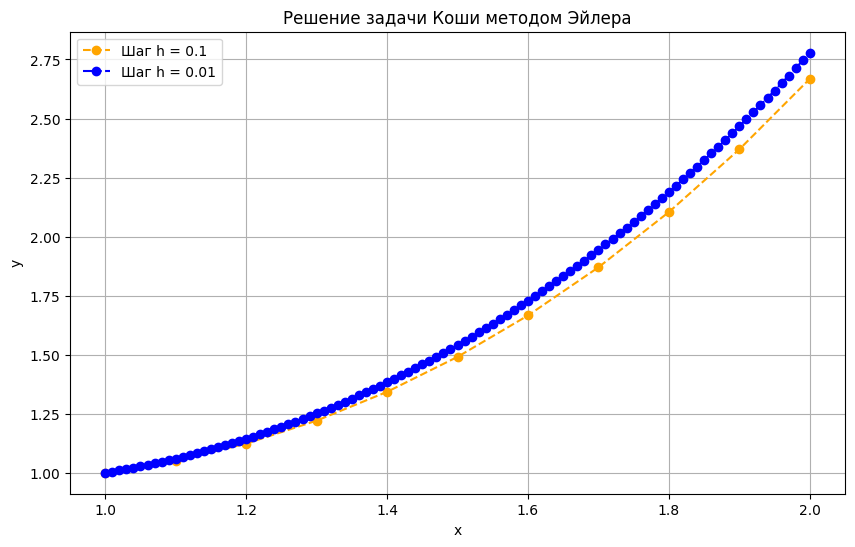

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Заданная функция y'(x)
def f(x, y):
    return -y / (2 * x) + x**2

# Метод Эйлера
def euler_method(x0, y0, h, x_end):
    x_values = [x0]
    y_values = [y0]
    
    x = x0
    y = y0
    while x < x_end:
        y = y + h * f(x, y)  # Основная формула метода Эйлера
        x = x + h
        x_values.append(x)
        y_values.append(y)
    
    return np.array(x_values), np.array(y_values)

# Начальные условия
x0 = 1.0  # Начальное значение x
y0 = 1.0  # Начальное значение y
x_end = 2.0  # Конечное значение x

# Решение с шагами h = 0.1 и h = 0.01
h1 = 0.1
h2 = 0.01

x_h1_orig, y_h1_orig = euler_method(x0, y0, h1, x_end)
x_h2_orig, y_h2_orig = euler_method(x0, y0, h2, x_end)

# Визуализация результатов (график)
plt.figure(figsize=(10, 6))

# График для h = 0.1
plt.plot(x_h1_orig, y_h1_orig, label="Шаг h = 0.1", color = 'orange', marker='o', linestyle='--')

# График для h = 0.01
plt.plot(x_h2_orig, y_h2_orig, label="Шаг h = 0.01",color = 'blue', marker='o', linestyle='-.')

# Настройка графика
plt.title("Решение задачи Коши методом Эйлера")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()

##### Метод Эйлера с пересчётом

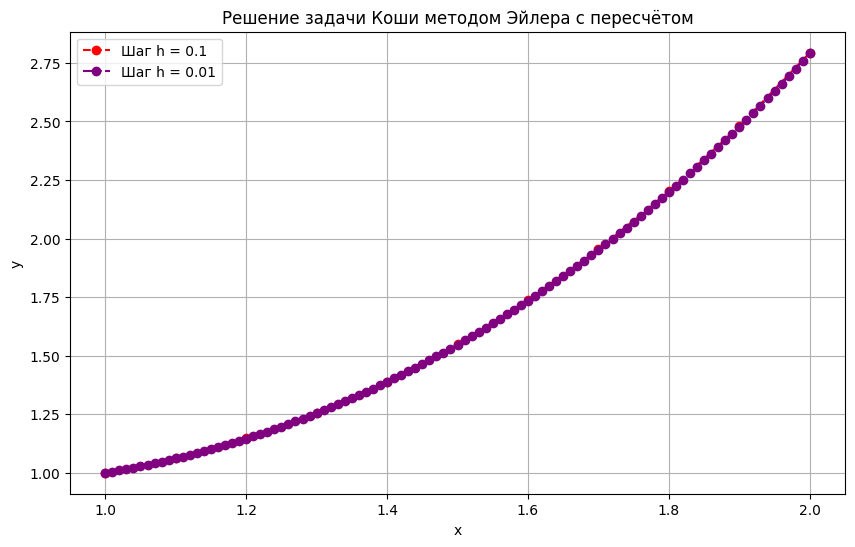

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Заданная функция y'(x)
def f(x, y):
    return -y / (2 * x) + x**2

# Модифицированный метод Эйлера
def modified_euler_method(x0, y0, h, x_end):
    x_values = [x0]
    y_values = [y0]
    
    x = x0
    y = y0
    while x < x_end:
        # Вычисляем некоторое значение y^* с использованием обычного метода Эйлера
        y_star = y + h * f(x, y)
        # Уточнённое значение на следующем шаге
        y = y + (h / 2) * (f(x, y) + f(x + h, y_star))
        x = x + h
        x_values.append(x)
        y_values.append(y)
    
    return np.array(x_values), np.array(y_values)

# Начальные условия
x0 = 1.0  # Начальное значение x
y0 = 1.0  # Начальное значение y
x_end = 2.0  # Конечное значение x

# Решения с шагами 0.1 и 0.01
h1 = 0.1
h2 = 0.01

x_h1, y_h1 = modified_euler_method(x0, y0, h1, x_end)
x_h2, y_h2 = modified_euler_method(x0, y0, h2, x_end)

# Построение графиков
plt.figure(figsize=(10, 6))

# График для h = 0.1
plt.plot(x_h1, y_h1, label="Шаг h = 0.1",color = 'red', marker='o', linestyle='--')

# График для h = 0.01
plt.plot(x_h2, y_h2, label="Шаг h = 0.01",color = 'purple', marker='o', linestyle='-.')

# Настройка графика
plt.title("Решение задачи Коши методом Эйлера с пересчётом")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# Показать график
plt.show()

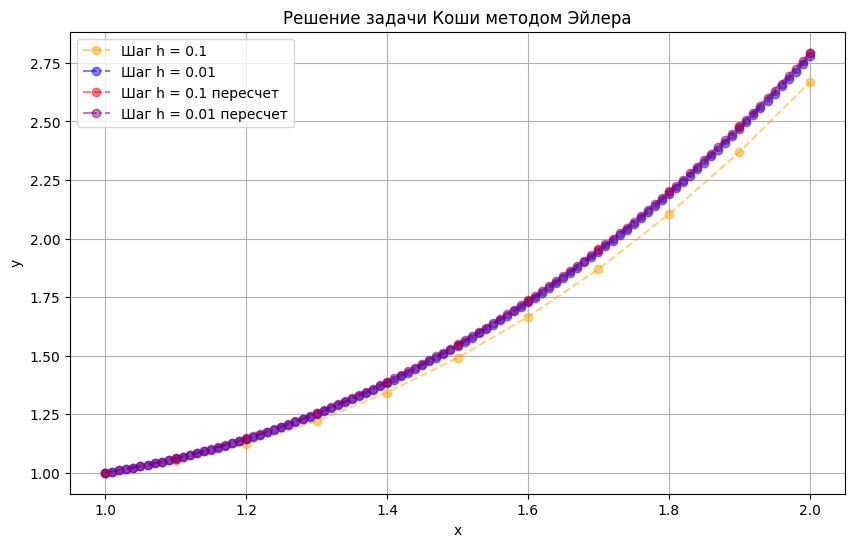

In [23]:
plt.figure(figsize=(10, 6))

# График для h = 0.1
plt.plot(x_h1_orig, y_h1_orig, label="Шаг h = 0.1",alpha = 0.5, color = 'orange', marker='o', linestyle='--')

# График для h = 0.01
plt.plot(x_h2_orig, y_h2_orig, label="Шаг h = 0.01",alpha = 0.5,color = 'blue', marker='o', linestyle='-.')

plt.plot(x_h1, y_h1, label="Шаг h = 0.1 пересчет",alpha = 0.5,color = 'red', marker='o', linestyle='--')

# График для h = 0.01
plt.plot(x_h2, y_h2, label="Шаг h = 0.01 пересчет",alpha = 0.5, color = 'purple', marker='o', linestyle='-.')

# Настройка графика
plt.title("Решение задачи Коши методом Эйлера")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()

### 3.2

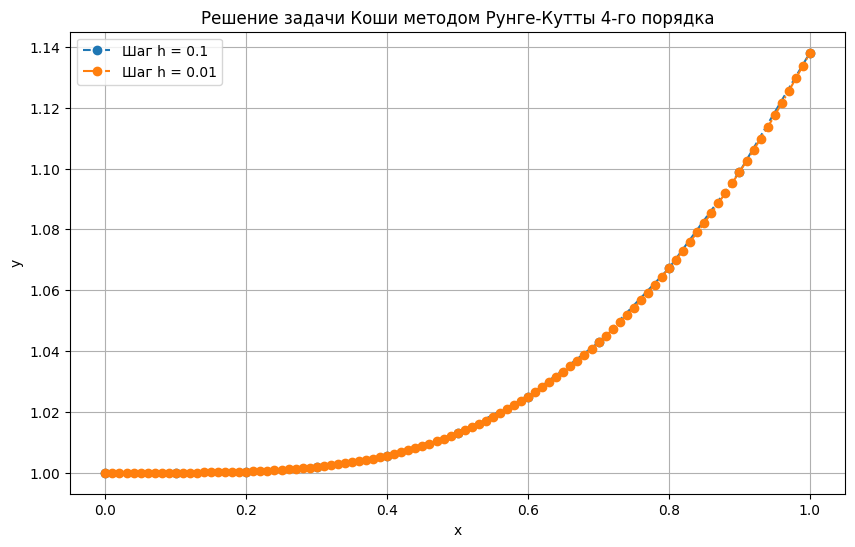

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Заданная функция y'(x)
def f(x, y):
    return (-y * x + x * (x**2 + 1)) / (x**2 + 1)

# Метод Рунге-Кутты 4-го порядка
def runge_kutta_4(x0, y0, h, x_end):
    x_values = [x0]
    y_values = [y0]
    
    x = x0
    y = y0
    while x < x_end- 0.001:
        k1 = f(x, y)
        k2 = f(x + h / 2, y + h / 2 * k1)
        k3 = f(x + h / 2, y + h / 2 * k2)
        k4 = f(x + h, y + h * k3)
        y = y + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
        x = x + h
        
        x_values.append(x)
        y_values.append(y)
    
    return np.array(x_values), np.array(y_values)

# Начальные условия
x0 = 0.0  # Начальное значение x
y0 = 1.0  # Начальное значение y
x_end = 1.0  # Конечное значение x

# Решения с шагами 0.1 и 0.01
h1 = 0.1
h2 = 0.01

x_h1, y_h1 = runge_kutta_4(x0, y0, h1, x_end)
x_h2, y_h2 = runge_kutta_4(x0, y0, h2, x_end)

# Построение графиков
plt.figure(figsize=(10, 6))

# График для h = 0.1
plt.plot(x_h1, y_h1, label="Шаг h = 0.1", marker='o', linestyle='--')

# График для h = 0.01
plt.plot(x_h2, y_h2, label="Шаг h = 0.01", marker='o', linestyle='-.')

# Настройка графика
plt.title("Решение задачи Коши методом Рунге-Кутты 4-го порядка")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# Показать график
plt.show()

### 3.3

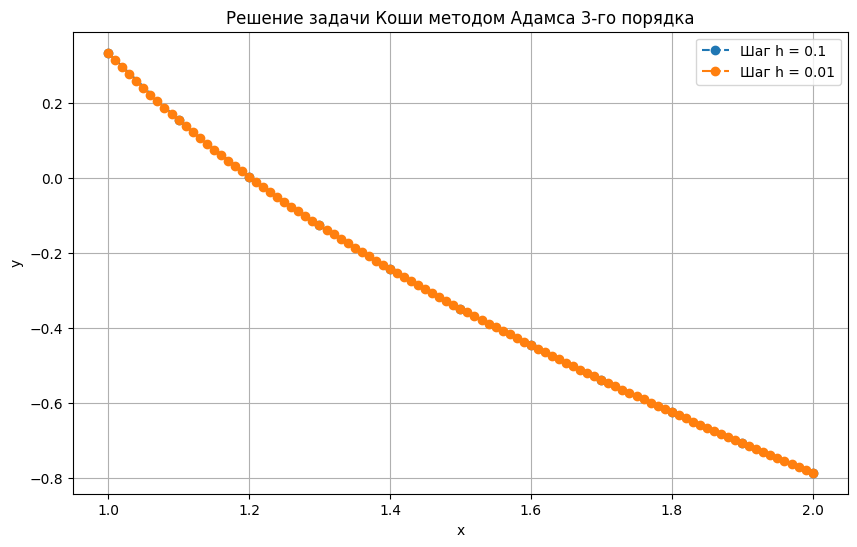

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Заданная функция y'(x)
def f(x, y):
    return (2 * y * np.log(x) - 2) / (x**2)

# Метод Рунге-Кутты 4-го порядка для начальных точек
def runge_kutta_4(x0, y0, h, steps):
    x_values = [x0]
    y_values = [y0]
    
    x = x0
    y = y0
    for _ in range(steps - 1):
        k1 = f(x, y)
        k2 = f(x + h / 2, y + h / 2 * k1)
        k3 = f(x + h / 2, y + h / 2 * k2)
        k4 = f(x + h, y + h * k3)
        y = y + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
        x = x + h
        x_values.append(x)
        y_values.append(y)
    
    return np.array(x_values), np.array(y_values)

# Метод Адамса 3-го порядка
def adams_method(x0, y0, h, x_end):
    # Используем метод Рунге-Кутты для начальных точек
    rk_steps = 3  # Нужно как минимум 3 точки
    x_rk, y_rk = runge_kutta_4(x0, y0, h, rk_steps)
    
    # Задаём массивы для x и y
    x_values = list(x_rk)
    y_values = list(y_rk)
    
    # Предварительные вычисления f для начальных точек
    f_values = [f(x_values[i], y_values[i]) for i in range(rk_steps)]

    # Адамс-Башфорт (экстраполяция)
    while x_values[-1] < x_end:
        x_next = x_values[-1] + h
        y_next = y_values[-1] + (h / 12) * (23 * f_values[-1] - 16 * f_values[-2] + 5 * f_values[-3])
        
        # Вычисляем f(x_{n+1}, y_{n+1})
        f_next = f(x_next, y_next)

        # Адамс-Мултон (уточнение)
        y_next = y_values[-1] + (h / 24) * (9 * f_next + 19 * f_values[-1] - 5 * f_values[-2] + f_values[-3])
        
        # Добавляем значения в массивы
        x_values.append(x_next)
        y_values.append(y_next)
        f_values.append(f(x_next, y_next))

        # Поддерживаем длину массива f (оставляем только последние 3 значения)
        f_values = f_values[-3:]
    
    return np.array(x_values), np.array(y_values)

# Начальные условия
x0 = 1.0  # Начальное значение x
y0 = 0.333333  # Начальное значение y
x_end = 2.0  # Конечное значение x

# Решение для шагов h = 0.1 и h = 0.01
h1 = 0.1
h2 = 0.01

x_h1, y_h1 = adams_method(x0, y0, h1, x_end)
x_h2, y_h2 = adams_method(x0, y0, h2, x_end)

# Построение графиков
plt.figure(figsize=(10, 6))

# График для h = 0.1
plt.plot(x_h1, y_h1, label="Шаг h = 0.1", marker='o', linestyle='--')

# График для h = 0.01
plt.plot(x_h2, y_h2, label="Шаг h = 0.01", marker='o', linestyle='-.')

# Настройка графика
plt.title("Решение задачи Коши методом Адамса 3-го порядка")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# Показать график
plt.show()

### 3.5

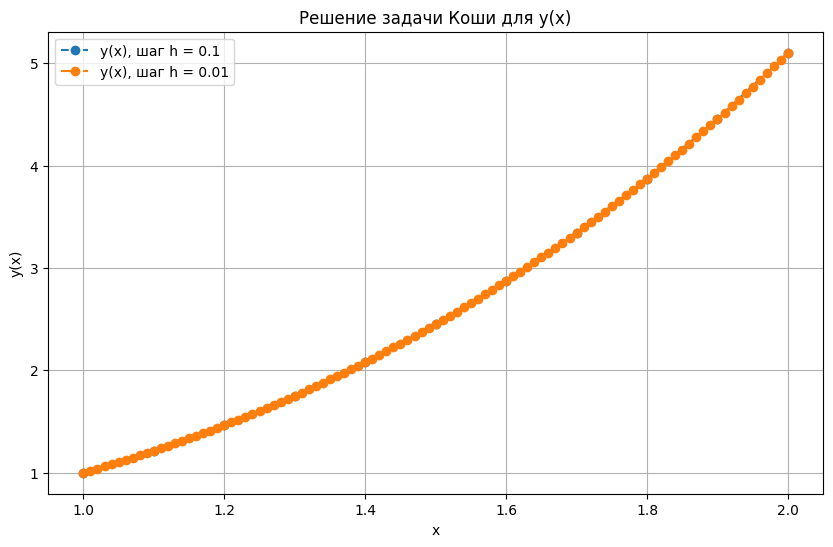

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Система уравнений
def f1(x, y1, y2):
    return y2  # y1' = y2

def f2(x, y1, y2):
    return (-y1 + 2 * (x**3) * y2) / (x**4)  # y2' = ...

# Метод Рунге-Кутты 4-го порядка для системы ОДУ
def runge_kutta_4_system(x0, y1_0, y2_0, h, x_end):
    x_values = [x0]
    y1_values = [y1_0]
    y2_values = [y2_0]
    
    x = x0
    y1 = y1_0
    y2 = y2_0
    
    while x < x_end:
        # Вычисляем промежуточные параметры k1, k2, k3, k4 для y1 и y2
        k1_y1 = h * f1(x, y1, y2)
        k1_y2 = h * f2(x, y1, y2)
        
        k2_y1 = h * f1(x + h / 2, y1 + k1_y1 / 2, y2 + k1_y2 / 2)
        k2_y2 = h * f2(x + h / 2, y1 + k1_y1 / 2, y2 + k1_y2 / 2)
        
        k3_y1 = h * f1(x + h / 2, y1 + k2_y1 / 2, y2 + k2_y2 / 2)
        k3_y2 = h * f2(x + h / 2, y1 + k2_y1 / 2, y2 + k2_y2 / 2)
        
        k4_y1 = h * f1(x + h, y1 + k3_y1, y2 + k3_y2)
        k4_y2 = h * f2(x + h, y1 + k3_y1, y2 + k3_y2)
        
        # Обновляем значения y1 и y2
        y1 = y1 + (k1_y1 + 2 * k2_y1 + 2 * k3_y1 + k4_y1) / 6
        y2 = y2 + (k1_y2 + 2 * k2_y2 + 2 * k3_y2 + k4_y2) / 6
        
        # Обновляем значение x
        x = x + h
        
        # Сохраняем результаты
        x_values.append(x)
        y1_values.append(y1)
        y2_values.append(y2)
    
    return np.array(x_values), np.array(y1_values), np.array(y2_values)

# Начальные условия
x0 = 1.0  # Начальное значение x
y1_0 = 1.0  # y(1) = 1
y2_0 = 2.0  # y'(1) = 2
x_end = 2.0  # Конечное значение x

# Решения с шагами 0.1 и 0.01
h1 = 0.1
h2 = 0.01

x_h1, y1_h1, y2_h1 = runge_kutta_4_system(x0, y1_0, y2_0, h1, x_end)
x_h2, y1_h2, y2_h2 = runge_kutta_4_system(x0, y1_0, y2_0, h2, x_end)

# Построение графиков
plt.figure(figsize=(10, 6))

# График для y(x) при h = 0.1
plt.plot(x_h1, y1_h1, label="y(x), шаг h = 0.1", marker='o', linestyle='--')

# График для y(x) при h = 0.01
plt.plot(x_h2, y1_h2, label="y(x), шаг h = 0.01", marker='o', linestyle='-.')

# Настройка графика
plt.title("Решение задачи Коши для y(x)")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.grid(True)

# Показать график
plt.show()

### 3.5

-1.49264444259186e+29
-1.4157689873453772e+30
3.5339079503501624e+16
-2163617112459287.0
1803014260382741.8
-1081808556229644.8
0.0
Найденное начальное значение y'(0): nan


/var/folders/xd/_6rn45qj0dn1mjy4fxcmf7s40000gn/T/ipykernel_98941/4012841371.py:69: RuntimeWarning: invalid value encountered in scalar divide
  alpha_new = alpha2 - F2 * (alpha2 - alpha1) / (F2 - F1)


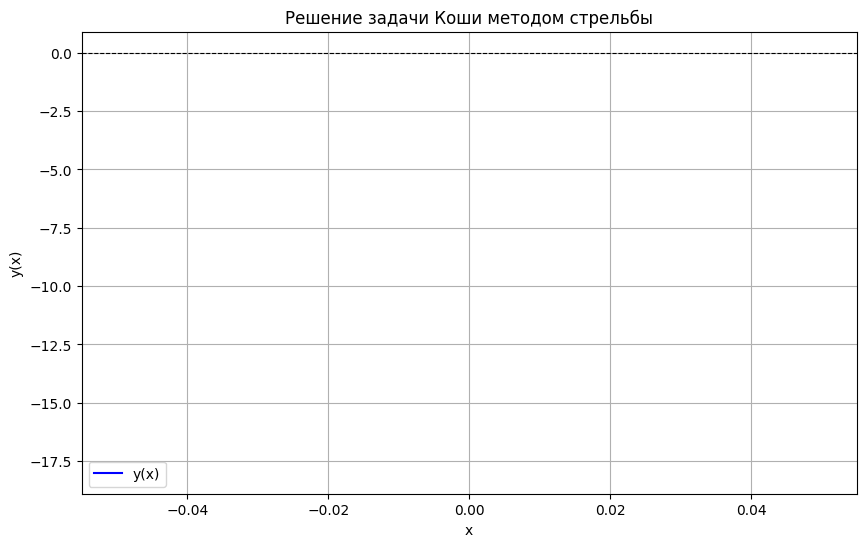

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Система уравнений первого порядка
def f1(x, y1, y2):
    return y2  # y_1' = y_2

def f2(x, y1, y2):
    return -((x - 3) * y2 + y1) / (x**2 - 1)  # y_2' = ...

# Метод Рунге-Кутты 4-го порядка для системы
def runge_kutta_4(x0, y1_0, y2_0, h, x_end):
    x_values = [x0]
    y1_values = [y1_0]
    y2_values = [y2_0]
    
    x = x0
    y1 = y1_0
    y2 = y2_0
    
    while x < x_end:
        # Промежуточные вычисления k
        k1_y1 = h * f1(x, y1, y2)
        k1_y2 = h * f2(x, y1, y2)
        
        k2_y1 = h * f1(x + h / 2, y1 + k1_y1 / 2, y2 + k1_y2 / 2)
        k2_y2 = h * f2(x + h / 2, y1 + k1_y1 / 2, y2 + k1_y2 / 2)
        
        k3_y1 = h * f1(x + h / 2, y1 + k2_y1 / 2, y2 + k2_y2 / 2)
        k3_y2 = h * f2(x + h / 2, y1 + k2_y1 / 2, y2 + k2_y2 / 2)
        
        k4_y1 = h * f1(x + h, y1 + k3_y1, y2 + k3_y2)
        k4_y2 = h * f2(x + h, y1 + k3_y1, y2 + k3_y2)
        
        # Вычисление новых значений y1, y2
        y1 += (k1_y1 + 2 * k2_y1 + 2 * k3_y1 + k4_y1) / 6
        y2 += (k1_y2 + 2 * k2_y2 + 2 * k3_y2 + k4_y2) / 6
        
        # Обновление x
        x += h
        
        # Сохранение результатов
        x_values.append(x)
        y1_values.append(y1)
        y2_values.append(y2)
    
    return np.array(x_values), np.array(y1_values), np.array(y2_values)

def find_initial_guesses(x0, y1_0, x_end, y1_end, h):
    for alpha1 in np.linspace(-50, 50, 100):
        _, y1_1, _ = runge_kutta_4(x0, y1_0, alpha1, h, x_end)
        if abs(y1_1[-1] - y1_end) > 1:
            return alpha1 - 5, alpha1 + 5  # Возврат угаданных значений (ближе к рабочему диапазону)

# Метод стрельбы
def shooting_method(x0, y1_0, x_end, y1_end, h, alpha1, alpha2, tol=1e-6):
    # Первая стрельба
    _, y1_1, _ = runge_kutta_4(x0, y1_0, alpha1, h, x_end)
    F1 = y1_1[-1] - y1_end  # Ошибка для alpha1

    # Вторая стрельба
    _, y1_2, _ = runge_kutta_4(x0, y1_0, alpha2, h, x_end)
    F2 = y1_2[-1] - y1_end  # Ошибка для alpha2

    # Итерация методом секущих для нахождения оптимального alpha
    while abs(F2) > tol:
        # Вычисление нового alpha
        print((F2 - F1))
        alpha_new = alpha2 - F2 * (alpha2 - alpha1) / (F2 - F1)

        # Новая стрельба
        _, y1_new, _ = runge_kutta_4(x0, y1_0, alpha_new, h, x_end)
        F_new = y1_new[-1] - y1_end

        # Обновление alpha
        alpha1, F1 = alpha2, F2
        alpha2, F2 = alpha_new, F_new

    return alpha2, y1_new

# Начальные условия и параметры
x0 = 0.0  # Начальное значение x
y1_0 = -18.0  # y(0) = -18
x_end = 3.0  # Конечное значение x, y(3) = 0
y1_end = 0.0  # Граничное условие y(3) = 0

# Предполагаемые значения начала y'(0)
alpha1, alpha2 = find_initial_guesses(x0, y1_0, x_end, y1_end, h)

# Шаг интегрирования
h = 0.1

# Решение задачи стрельбы
alpha, y1_solution = shooting_method(x0, y1_0, x_end, y1_end, h, alpha1, alpha2)

# Построение графика решения
x_values, y1_values, _ = runge_kutta_4(x0, y1_0, alpha, h, x_end)

# Вывод найденного значения
print(f"Найденное начальное значение y'(0): {alpha:.6f}")

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_values, y1_values, label="y(x)", color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Решение задачи Коши методом стрельбы")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.legend()
plt.show()

### 3.6

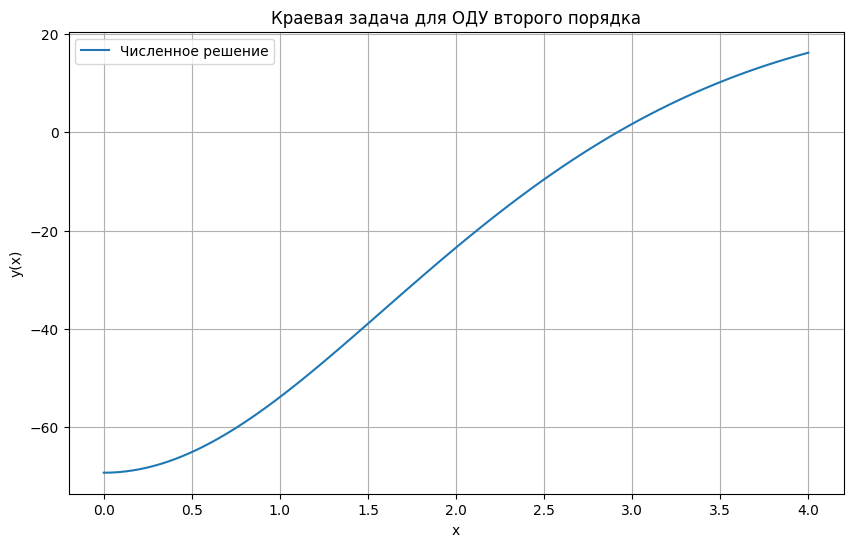

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Константы и параметры задачи
x0 = 0.0  # Начальная точка x
xN = 4.0  # Конечная точка x
N = 100  # Количество точек разбиения
h = (xN - x0) / (N - 1)  # Шаг вычислений
x = np.linspace(x0, xN, N)  # Узловые точки

# Коэффициенты конечно-разностного метода
a = lambda xi: xi * (xi**2 + 6) / h**2 - 2 * (xi**2 + 3) / (2 * h)
b = lambda xi: -2 * xi * (xi**2 + 6) / h**2 + 6 * xi
c = lambda xi: xi * (xi**2 + 6) / h**2 + 2 * (xi**2 + 3) / (2 * h)

# Сборка системы уравнений
A = np.zeros((N, N))
b_vec = np.zeros(N)

# Внутренние точки (основное уравнение)
for i in range(1, N - 1):
    A[i, i - 1] = a(x[i])
    A[i, i] = b(x[i])
    A[i, i + 1] = c(x[i])
    b_vec[i] = 0.0

# Граничные условия
# Условие при x = 0: y'(0) = 0 -> y_0 = (4y_1 - y_2) / 3
A[0, 0] = -3
A[0, 1] = 4
A[0, 2] = -1
b_vec[0] = 0

# Условие при x = 4: y(4) - y'(4) = 26 -> y_N - (y_N - y_{N-1}) / h = 26
A[-1, -1] = 1 + 1 / h
A[-1, -2] = -1 / h
b_vec[-1] = 26

# Решение системы
y = np.linalg.solve(A, b_vec)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Численное решение")
plt.title("Краевая задача для ОДУ второго порядка")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid()
plt.legend()
plt.show()

### 4.1

ПРЕДУПРЕЖДЕНИЕ: не выполняется условие устойчивости s <= 0.5!


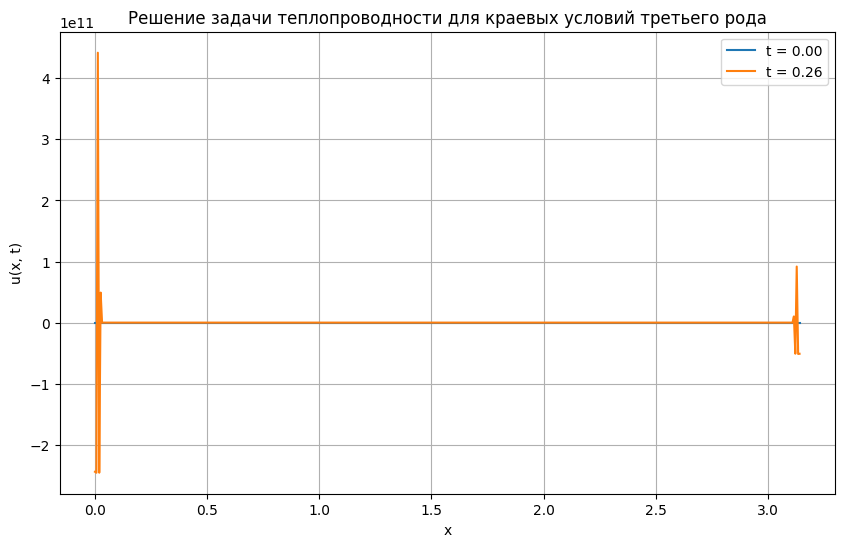

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Задаём параметры
L = math.pi       # Длина стержня
T = 1.0       # Время моделирования
Nx = 500       # Число ячеек по x
Nt = 20    # Число шагов по времени
a = 1.0       # Коэффициент диффузии
b = 0.5       # Коэффициент конвекции
c = -0.5       # Коэффициент реакции

alpha1, beta1 = 1.0, 1.0  # Коэф. для граничного условия слева
alpha2, beta2 = 1.0, 1.0  # Коэф. для граничного условия справа
g1 = lambda t: math.e**((c-a)*t)*(math.cos(b*t) + math.sin(b*t))         # Левая граница (например, g1(t) = 0)
g2 = lambda t: -math.e**((c-a)*t)*(math.cos(b*t) + math.sin(b*t))           # Правая граница (например, g2(t) = 0)

# Сетка и шаги
dx = L / (Nx - 1)
dt = T / (Nt - 1)
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)

# Проверка критерия устойчивости
s = a * dt / dx**2
if s > 0.5:
    print("ПРЕДУПРЕЖДЕНИЕ: не выполняется условие устойчивости s <= 0.5!")

# Инициализация решения
u = np.zeros((Nt, Nx))  # Матрица решения
u[0, :] = np.sin(np.pi * x)  # Начальное условие: u(x, 0) = sin(pi * x)

# Явная схема
for n in range(0, Nt - 1):
    # Внутренние точки
    for i in range(1, Nx - 1):
        u_xx = (u[n, i+1] - 2*u[n, i] + u[n, i-1]) / dx**2
        u_x = (u[n, i+1] - u[n, i-1]) / (2 * dx)
        u[n+1, i] = u[n, i] + dt * (a * u_xx - b * u_x + c * u[n, i])
    
    # Граничные условия (третьего рода)
    # Левая граница: alpha1 * u[0] + beta1 * (u[1] - u[0]) / dx = g1(t)
    u[n+1, 0] = (g1(t[n]) * dx + beta1 * u[n+1, 1]) / (alpha1 * dx + beta1)
    
    # Правая граница: alpha2 * u[-1] + beta2 * (u[-1] - u[-2]) / dx = g2(t)
    u[n+1, -1] = (g2(t[n]) * dx + beta2 * u[n+1, -2]) / (alpha2 * dx + beta2)

# Построение графика
plt.figure(figsize=(10, 6))

# Временные срезы
times_to_plot = [0, Nt // 4, Nt // 2, Nt - 1]
for n in times_to_plot:
    if t[n] >0.27:
        break
    plt.plot(x, u[n, :], label=f"t = {t[n]:.2f}")

# Настройка графика
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Решение задачи теплопроводности для краевых условий третьего рода")
plt.legend()
plt.grid(True)
plt.show()